/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


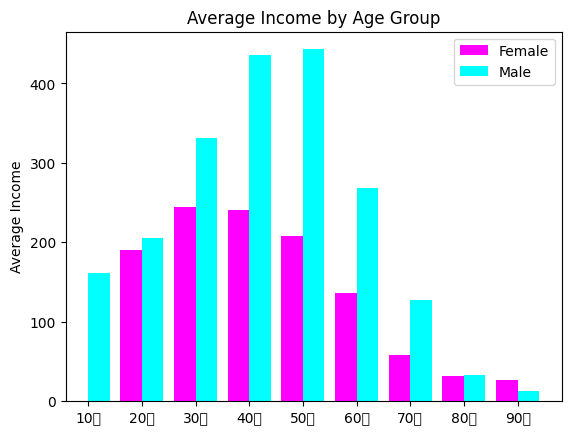

In [1]:
# 작성자: 송우석
# 4. 성별 월급 차이는 연령대 별로 다를까?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'D2Coding'

raw_welfare = pd.read_spss('../Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()
welfare = welfare.rename(columns = {'h14_g3':'sex',
                                    'h14_g4':'birth',
                                    'h14_g10':'marriage_type',
                                    'h14_g11':'religion',
                                    'p1402_8aq1':'income',
                                    'h14_eco9':'code_job',
                                    'h14_reg7':'code_region'})

# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# birth열로 나이 계산해 age열 생성
welfare['age'] = 2019-welfare['birth']

# 10대~90대 구간의 경계값 설정
bins = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대']

# 경계값을 기준으로 나누고, 라벨을 붙여서 welfare 데이터프레임에 age_group열을 만듦
welfare['age_group'] = pd.cut(welfare['age'], bins=bins, labels=labels, right=False)

# income열에 결측값이 있는 행 제거
welfare = welfare.dropna(subset = ['income'])

# female이 들어가는 행에서 'sex', 'age_group', 'income'열만 추출
female_data = welfare[welfare['sex'] == 'female'][['sex', 'age_group', 'income']]
# female_data에서 나이대별 월급 평균표 생성
female_age_group_income = female_data\
    .groupby('age_group', as_index = False)\
        .agg(average_income = ('income', 'mean'))

# female_data와 동일한 작업
male_data = welfare[welfare['sex'] == 'male'][['sex', 'age_group', 'income']]
male_age_group_income = male_data\
    .groupby('age_group', as_index = False)\
        .agg(average_income = ('income', 'mean'))

# x축 구간 나누기
x = np.arange(9)

# Female, Male 그래프
plt.bar(x - 0.2, female_age_group_income['average_income'], width=0.4, color='magenta', label='Female')
plt.bar(x + 0.2, male_age_group_income['average_income'], width=0.4, color='cyan', label='Male')

# 그래프 서식
plt.title('Average Income by Age Group')
plt.xticks(x, female_age_group_income['age_group'])
plt.ylabel('Average Income')
plt.legend()

# 성별에 따른 월급은 90대를 제외한 구간에서 남성이 여성보다 많고, 그 차이는 50대에서 가장 크게 나타난다.
plt.show()